# Пример с распознаванием цифр

In [24]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

Загружаем данные

In [25]:
digits = datasets.load_digits()

In [26]:
print(digits.images[:2])

[[[ 0.  0.  5. 13.  9.  1.  0.  0.]
  [ 0.  0. 13. 15. 10. 15.  5.  0.]
  [ 0.  3. 15.  2.  0. 11.  8.  0.]
  [ 0.  4. 12.  0.  0.  8.  8.  0.]
  [ 0.  5.  8.  0.  0.  9.  8.  0.]
  [ 0.  4. 11.  0.  1. 12.  7.  0.]
  [ 0.  2. 14.  5. 10. 12.  0.  0.]
  [ 0.  0.  6. 13. 10.  0.  0.  0.]]

 [[ 0.  0.  0. 12. 13.  5.  0.  0.]
  [ 0.  0.  0. 11. 16.  9.  0.  0.]
  [ 0.  0.  3. 15. 16.  6.  0.  0.]
  [ 0.  7. 15. 16. 16.  2.  0.  0.]
  [ 0.  0.  1. 16. 16.  3.  0.  0.]
  [ 0.  0.  1. 16. 16.  6.  0.  0.]
  [ 0.  0.  1. 16. 16.  6.  0.  0.]
  [ 0.  0.  0. 11. 16. 10.  0.  0.]]]


Пример первой цифры

In [27]:
digits['data'][0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [28]:
digits['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [29]:
digits['target'][:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Нарисуем пример цифры

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 432x288 with 0 Axes>

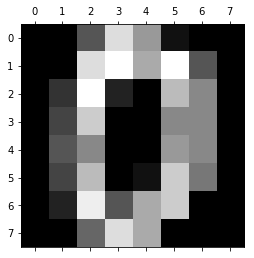

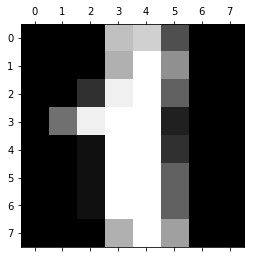

In [31]:
plt.gray()
for i in range(0, 2):
    plt.matshow(digits.images[i])
    
plt.show() 

Признаки и целевая переменная

In [9]:
X_digits = digits.data
Y_digits = digits.target

In [10]:
X_digits.shape

(1797, 64)

Количество цифр в данных

In [11]:
n_samples = len( X_digits )

Разобьем данные на обучающую выборку и тест в пропорции 90 / 10

In [12]:
split = int( n_samples * .9 )
split

1617

Обучающая выборка

In [13]:
X_train = X_digits[:split]
Y_train = Y_digits[:split]

## Формируем тестовую выборку и обучаем модель knn

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, Y_digits, 
                                                    train_size=0.9, random_state=42)

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':range(1,6), 'p':[1,2],'weights':['uniform','distance']}
grid = GridSearchCV(KNeighborsClassifier(weights='distance', p=1), params, cv=5)

При помощи GridSearch можно подобрать лучшие параметры и сразу оценить на них тестовую выборку.

In [18]:
grid.fit(X_train, y_train)
print('Test score: {0:.2f}'.format(grid.score(X_test, y_test)))

Test score: 0.98


In [19]:
grid.best_params_

{'n_neighbors': 4, 'p': 2, 'weights': 'distance'}

In [20]:
knn=KNeighborsClassifier(n_neighbors=4, p=2, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='distance')

In [21]:
knn.score(X_train, y_train)

1.0

**Результат очень хороший, но это не показатель на обущающей выборке. Ниже оценка на тестовой выборке. Модель довольно хорошо обобощена.**

In [22]:
knn.score(X_test, y_test)

0.9833333333333333

## Shape MNIST DataSet with KN

In [33]:
import pandas as pd
import numpy as np
data = pd.read_csv('Fashion MNIST/fashion_mnist_train.csv')
data_test = pd.read_csv('Fashion MNIST/fashion_mnist_test.csv')

* 0 T-shirt
* 1 Trouses
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot 

<Figure size 432x288 with 0 Axes>

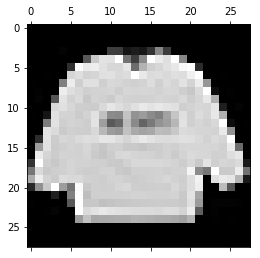

In [35]:
plt.gray()
plt.matshow(np.array(data.iloc[0][1:]).reshape(28,28))

In [36]:
X=data.drop(['label'], axis=1)

In [37]:
y=data.label

**Набор данных довольно большой и обучение модели занимает невозможно долгое время. Решил взять только часть для экпериментов.**

Для более репрезентативной выборки, использую функцию train_test_split

In [36]:
X_big, X_small, y_big, y_small = train_test_split(X, y, test_size=0.1)


In [37]:
X_train, X_test, y_train, t_test = train_test_split(X_small, y_small)


(6000, 784)

In [45]:
shape_knn = KNeighborsClassifier()
shape_knn.fit(X_train, y_train)
shape_knn.score(X_train, y_train)

0.8738666666666667

In [46]:
shape_knn.score(X_test, y_test)

0.8148

In [47]:
shape_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

**К сожалению, мне не удалось подобрать такие гиперпараметры, которые позволили бы получить хорошее обобщение модели на KNeighborsClassifier.**